# Big Data Analysis Lab1

### NAME : Kunal Sanjay Patil

### PRN : 20190802025

## Question 1
1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to download data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) 
2. Mention High level statistics of the dataset: number of points, number of features, number of classes, data-points per class.
3. Explain our objective.
4. Perform Univariate analysis (PDF, CDF, Boxplot, Violin plots) to understand which features are useful towards classification.
5. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classification.
6. Most important Write your observations in English words to summarize patient condition. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('haberman.csv', header=None)
column_name = ["age","year","nodes","status"]
df.columns = column_name
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
df.shape

(306, 4)

In [6]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [7]:
df.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

The Haberman's survival dataset consists of 4 attributes:

Age of patient at time of operation (numerical)<br>
Patient's year of operation (year - 1900, numerical)<br>
Number of positive axillary nodes detected (numerical)<br>
Survival status (class attribute)<br>
1 = the patient survived 5 years or longer (225 records)<br>
2 = the patient died within 5 year (81 records) <br>
The dataset contains 306 instances and there are no missing values.

<b>Objective: </b><br>
Our objective is to predict whether a patient can be saved from cancer or not by performing exploratory data analysis. We try to find out which features are useful for the classification with the help of univariate and bivariate analysis.


### Univariate Analysis

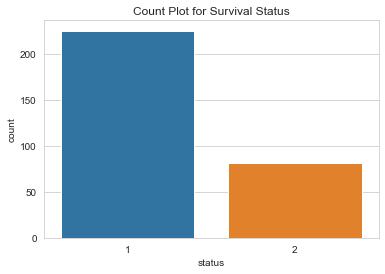

In [8]:
sns.countplot(x = df['status']).set_title('Count Plot for Survival Status')
plt.show()

Text(0.5, 1.0, 'Histogram plot for detcteted age.')

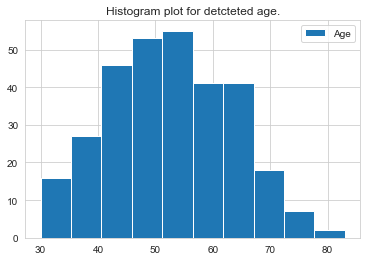

In [9]:
plt.hist(df["age"],label="Age")
plt.legend()
plt.title("Histogram plot for detcteted age.")

PDF - (Probability Density Function) PDF shows the density of that data or number of data present on that point. PDF will be a peak like structure represents high peak if more number of data present or else it will be flat/ small peak if number of data present is less.It is smooth graph plot using the edges of histogram. <br>
CDF - (Cumulative Distribution Function) CDF is representation of cumulative data of PDF ie. it will plot a graph by considering PDF for every data point cumulatively.

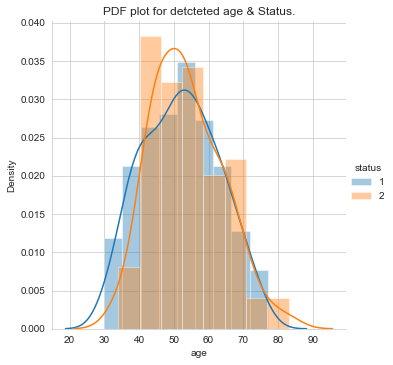

In [10]:
# PDF of Age
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title("PDF plot for detcteted age & Status.")
plt.show()

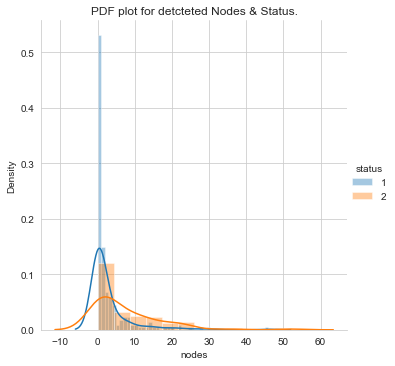

In [11]:
# PDF of nodes
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.title("PDF plot for detcteted Nodes & Status.")
plt.show()

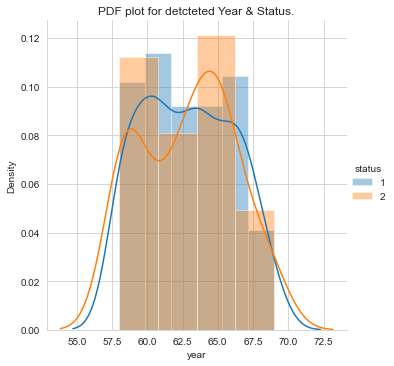

In [12]:
# PDF of Year Of Operation
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.title("PDF plot for detcteted Year & Status.")
plt.show()

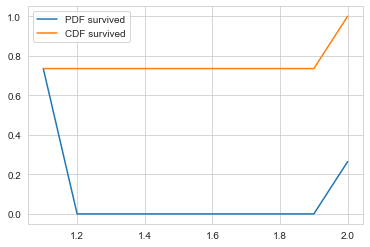

In [13]:
# PDF and CDF
count, bin_edges = np.histogram(df['status'], bins=10, density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF survived')
plt.plot(bin_edges[1:], cdf, label='CDF survived')
plt.legend()
plt.show()

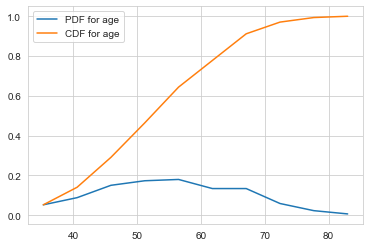

In [14]:
count, bin_edges = np.histogram(df['age'], bins=10, density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF for age')
plt.plot(bin_edges[1:], cdf, label='CDF for age')
plt.legend()
plt.show()

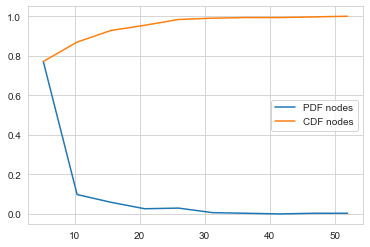

In [15]:
count, bin_edges = np.histogram(df['nodes'], bins=10, density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF nodes')
plt.plot(bin_edges[1:], cdf, label='CDF nodes')
plt.legend()
plt.show()

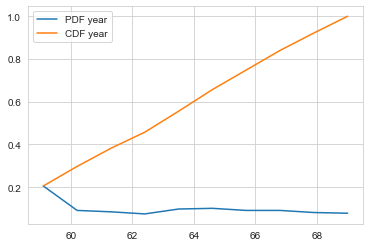

In [16]:
count, bin_edges = np.histogram(df['year'], bins=10, density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF year')
plt.plot(bin_edges[1:], cdf, label='CDF year')
plt.legend()
plt.show()

### Boxplots and Violin Plots

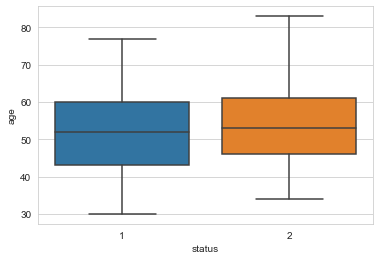

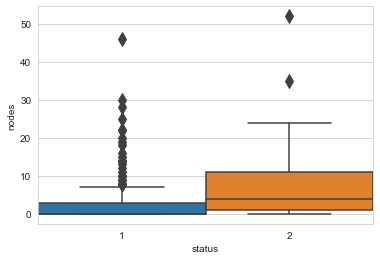

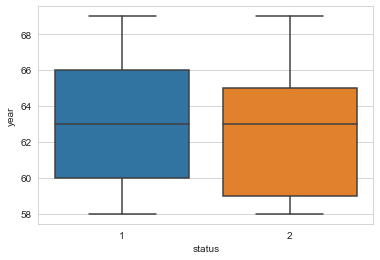

In [17]:
sns.boxplot(x='status',y='age',data=df)
plt.show()
sns.boxplot(x='status',y='nodes', data=df, width=1.0, fliersize=10)
plt.show()
sns.boxplot(x='status',y='year', data=df)
plt.show()

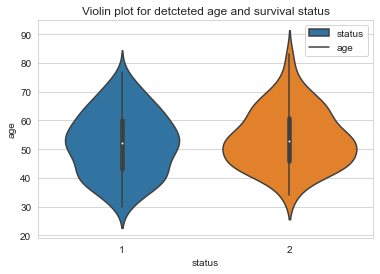

In [18]:
# A violin plot combines the benefits of the previous two plots and simplifies
#Denser regions of the data are fatter, and sparser ones thinner.

sns.violinplot(x="status", y="age", data=df, size=8)
plt.title("Violin plot for detcteted age and survival status")
plt.legend(labels=["status","age"])
plt.show()

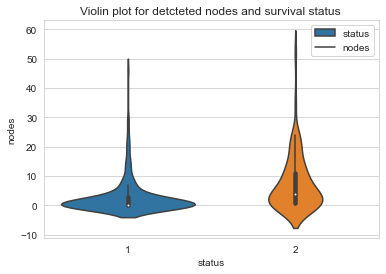

In [19]:
sns.violinplot(x="status", y="nodes", data=df, size=8)
plt.title("Violin plot for detcteted nodes and survival status ")
plt.legend(labels=["status","nodes"])
plt.show()

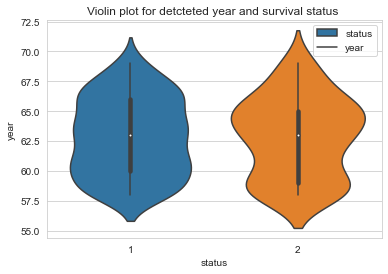

In [20]:
sns.violinplot(x="status", y="year", data=df, size=8)
plt.title("Violin plot for detcteted year and survival status ")
plt.legend(labels=["status","year"])
plt.show()

From the above box plots and violin plots, we can say that people in age group of 30-34 have 100% survival rate and patients of age around 78 could not survive for 5 years after the surgery. Also 50 percentile of people that survived have node 0.

In [21]:
df.corr()

,age,year,nodes,status
age,1.000000,0.089529,-0.063176,0.067950
year,0.089529,1.000000,-0.003764,-0.004768
nodes,-0.063176,-0.003764,1.000000,0.286768
status,0.067950,-0.004768,0.286768,1.000000


### Bivariate analysis - Scatter and Pair Plots

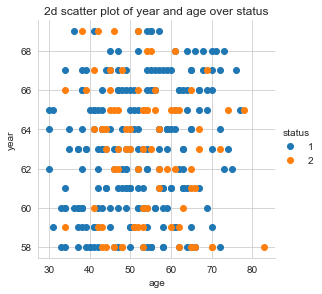

In [22]:
sns.FacetGrid(df, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
plt.title("2d scatter plot of year and age over status")   
plt.show()

From this plot we can say that, people with age between 30 and 40 operated in 1958,1960,1961,1962,1963,1964,1965,1967,1969 have survived.

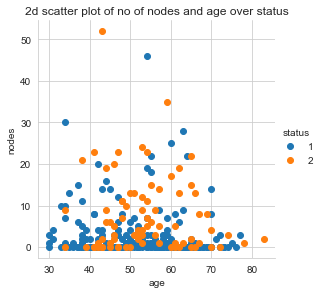

In [23]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("2d scatter plot of no of nodes and age over status") 
plt.show();

The points in the above scatter plot are randomly scattered and no line can seperate the classes.

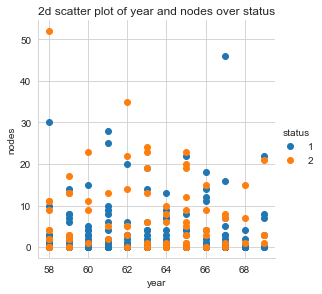

In [24]:
sns.FacetGrid(df, hue="status", height=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title("2d scatter plot of year and nodes over status") 
plt.show();

The points in the above scatter plot are randomly scattered and no line can seperate the classes.

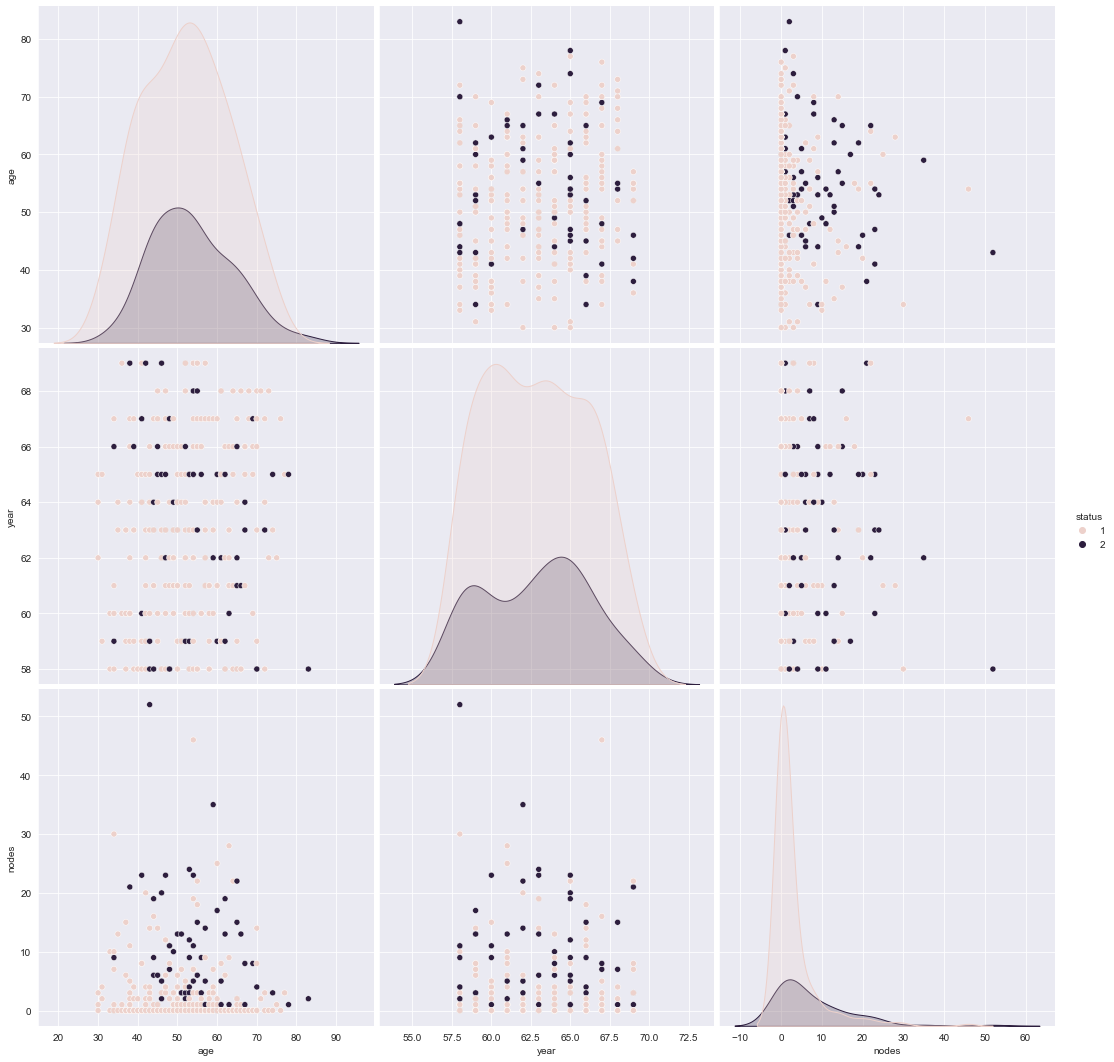

In [25]:
plt.close();
sns.set_style("darkgrid");
sns.pairplot(df, hue="status", height=5);
plt.show()

From the pair plot, we can say that the features 'age' and 'nodes' can be helpful. And in most of the plots we can observe an overlap of points.

## Question 2
What is the probability of observing different numbers of heads in 10 tosses with a fair coin? Find which distribution will get apply and plot it. Write a python script to draw the distribution. Hints: Binomial Distribution. 

<StemContainer object of 3 artists>

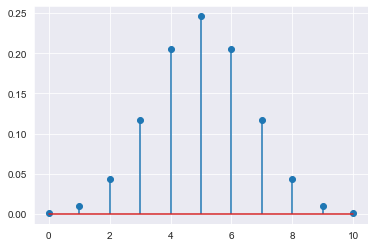

In [26]:
from scipy.stats import binom

num_trials = 10
heads_probability = .5

probs = [binom.pmf(i, num_trials, heads_probability) for i in range(11)]
plt.stem(list(range(11)), probs)

From the graph above, we can see that it's most likely to observe 5 heads in 10 tosses

## Question 3
Imagine you have a machine learning model deployed in the cloud and receiving requests from your customers in real-time. How much cloud resources do you need to pay for in order to be 99% sure you can serve all the traffic that arrives at the model in any one-minute period? (Note: 3.3 requests on average based on your traffic data). Draw the distribution using python. Hints: Poisson distribution 

<StemContainer object of 3 artists>

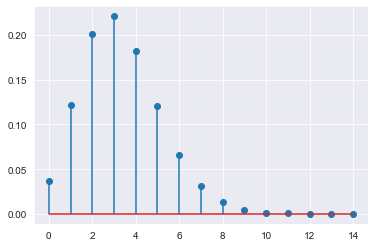

In [27]:
from scipy.stats import poisson

rate = 3.3

probs = [poisson.pmf(i, rate) for i in range(15)]
plt.stem(list(range(15)), probs)

In [28]:
simulated_request_per_minute = poisson.rvs(3.3, size=1_000_000)
np.percentile(simulated_request_per_minute, 99)

8.0

The cloud resources do you need to pay for in order to be 99% sure you can serve all the traffic that arrives at the model in any one-minute period would be 8.